# Group Project part 03

#### Deadline for the code submission: October 15th at 08:59 am CET

#### Reminder
- your group is the one assigned to you by the University.
- one goal of this project is to learn how to work as a group, which is the standard in the tech industry. Therefore you need to resolve group issues on your own, as a group.
- if you did not manage to resolve the group issues on your own, you need to escalate to the teacher early, not last minute.
- if the group splits, it would result in a 0 for the whole group.

**Penalty for unexcused absence or lateness**:
- If you are absent or late on presentation day without an official excuse, you will receive 0 for the presentation part of the group project.
- If you are late without an official excuse and can still make it to the presentation of your team, you will still receive 0 for the presentation part of the group project.

## Objective
In this project, you utilise your skills to :
- collect data through multiple APIs and open source datasets, for both quantitative and qualitative data
- merge data from different sources
- describe and analyse datasets
- uncover patterns, insights
- calculate aggregated measures, statistics
- create compelling data visualisations
- write clean code
- tell a story and convince your audience

Each group can pick one and one only scenario among the following ones.

Be mindful to pick a topic that enables enough data collection and analysis in order to showcase all the skills gathered during the course, listed above.

### Scenario 01: Become a Business Manager

Your task is to design a local business that leverages data from various APIs to make informed, strategic decisions. Whether you're launching a street food stand, a drink shop, or another local venture, your team will gather and analyze relevant data —such as foot traffic, weather patterns, customer trends, or competitor insights— to shape your business plan. Your final deliverable will be a data-supported report and/or presentation to a management board, demonstrating how your findings guide key decisions in operations, marketing, or product offerings. The ultimate goal: to optimize performance and increase the chances of business success. Will your business thrive in today’s data-driven world?
Examples:
- lemonade stands business
- food truck business
- delivery service

### Scenario 02: Fact Check Popular beliefs

You are part of a fact-checking research team investigating common beliefs, trending opinions, or viral social media claims (e.g. “drinking lemon water boosts metabolism” or “blue light ruins your sleep”). Your goal is to dig into reliable sources, data, and expert opinions to determine whether these beliefs hold up under scrutiny. Use data to challenge or prove real-world claims with clear, persuasive insights. Drawing on research, statistics, and visual evidence, your team will present a well-supported explanation to help your audience separate fact from fiction.

You may also choose to divide the group into two sides—one defending the belief and the other challenging it—before presenting your findings in a debate or side-by-side analysis.

Examples:
- Electric cars are always better for the environment
- Areas with more green space have better physical and mental health outcomes.
- Does public sentiment on social media predict stock market trends?

#Preparation:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
from IPython.display import HTML
from IPython.display import Image

## load data

In [3]:
import os
os.getcwd()

'/Users/CedricESMT/ESMT/Term 1/Data wrangling/data_wrangling_team_pluto'

In [6]:
path = '/Users/CedricESMT/ESMT/Term 1/Data wrangling/data_wrangling_team_pluto/data'

cpi = pd.read_csv(f'{path}/CPI_Global_Climate_Finance.csv')
oecd = pd.read_csv(f'{path}/OECD_ClimateFinance.csv')
imf_domcur = pd.read_csv(f'{path}/environment_imf_domcur.csv')
imf_gdp = pd.read_csv(f'{path}/environment_imf_gdp.csv')
worldb = pd.read_csv(f'{path}/worldb_final.csv')

In [95]:
countries = ['Australia', 'Belgium', 'France', 'Germany',
             'Netherlands', 'Poland', 'Spain', 'Switzerland',
             'United Kingdom']

worldb_oecd = worldb[worldb['Country'].isin(countries)]
worldb_oecd = worldb_oecd[worldb_oecd['Year'] > 2000]

oecd_worldb = oecd[oecd['Reference area'].isin(countries)]
oecd_worldb = oecd_worldb[['Reference area', 'Measure', 'Institutional sector','TIME_PERIOD', 'Unit of measure', 'OBS_VALUE']]
oecd_worldb['OBS_VALUE'] = oecd_worldb['OBS_VALUE'] * 1000000

sum_oecd = pd.pivot_table(oecd_worldb, values='OBS_VALUE', index=['Reference area', 'TIME_PERIOD'], aggfunc=np.sum)

sum_oecd_long = sum_oecd.stack().reset_index()
sum_oecd_long = sum_oecd_long.rename(columns={'level_3': 'TIME_PERIOD', 0: 'Total spending climate protection'})
sum_oecd_long = sum_oecd_long.drop(columns=['level_2'])
sum_oecd_long['TIME_PERIOD'] = sum_oecd_long['TIME_PERIOD'].astype(int)

#display(sum_oecd_long.head())
#display(worldb_oecd.shape)
#display(worldb_oecd.nunique())
#display(sum_oecd_long.nunique())
#display(worldb_oecd['Year'])
#display(sum_oecd_long['TIME_PERIOD'])

wb_oecd = pd.merge(worldb_oecd, sum_oecd_long, left_on=['Country', 'Year'], right_on=['Reference area', 'TIME_PERIOD'])
#display(wb_oecd.head()) 
wb_oecd = wb_oecd.drop(columns=['Reference area', 'TIME_PERIOD', 'Unnamed: 0', 'economy_Time'])
wb_oecd = wb_oecd.sort_values(by=(['Country', 'Year']), ascending=[True, True])
display(wb_oecd.head())

wb_oecd.to_csv(f'{path}/wb_oecd.csv')

/var/folders/lz/bn18_nv14nqff705lj069l5w0000gp/T/ipykernel_6889/215844866.py:12: FutureWarning: The provided callable <function sum at 0x106853060> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sum_oecd = pd.pivot_table(oecd_worldb, values='OBS_VALUE', index=['Reference area', 'TIME_PERIOD'], aggfunc=np.sum)


,Country,Year,Electricity production from coal sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),Electricity production from nuclear sources (% of total),Electricity production from oil sources (% of total),Renewable electricity output (% of total electricity output),"Electricity production from renewable sources, excluding hydroelectric (kWh)",...,GDP growth (annual %),"Population, total",Total greenhouse gas emissions including LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e),Carbon intensity of GDP (kg CO2e per constant 2015 US$ of GDP),Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990),Total greenhouse gas emissions excluding LULUCF (% change from 1990),Total spending climate protection
170,Australia,2001,83.151780,91.750173,7.538006,7.688472,0.0,0.909921,8.249872,1.599100e+09,...,2.025106,19274701.0,610.2984,556.2184,28.857433,360.4081,0.404806,29.777507,20.839312,7.630630e+09
169,Australia,2002,77.048626,92.067412,7.054998,13.943882,0.0,1.074905,7.932632,1.997100e+09,...,3.979586,19495210.0,619.2259,564.8485,28.973707,368.6209,0.398184,32.734812,22.714215,9.515331e+09
168,Australia,2003,77.413248,91.469733,7.468229,13.304227,0.0,0.752258,8.530312,2.345100e+09,...,3.090762,19720737.0,608.4748,555.3444,28.160428,368.1150,0.385716,32.552645,20.649434,9.520841e+09
167,Australia,2004,77.581271,91.724524,7.149111,13.535201,0.0,0.608053,8.275519,2.573100e+09,...,4.224285,19932722.0,598.3452,575.3785,28.866027,381.9420,0.383984,37.531539,25.001874,1.069342e+10
166,Australia,2005,79.422698,91.075443,6.827903,10.410234,0.0,1.242510,8.924601,4.794100e+09,...,3.154168,20176844.0,628.3905,578.2469,28.658937,384.0857,0.374332,38.303453,25.625038,1.118007e+10


## 06 - Clean and clear visualisations

Create **data visualisations** that clearly state your point and support your decision-making.


**Presentation: present each data visualisation and integrate them in your storytelling. Explain why they are relevant for your decision-making.**

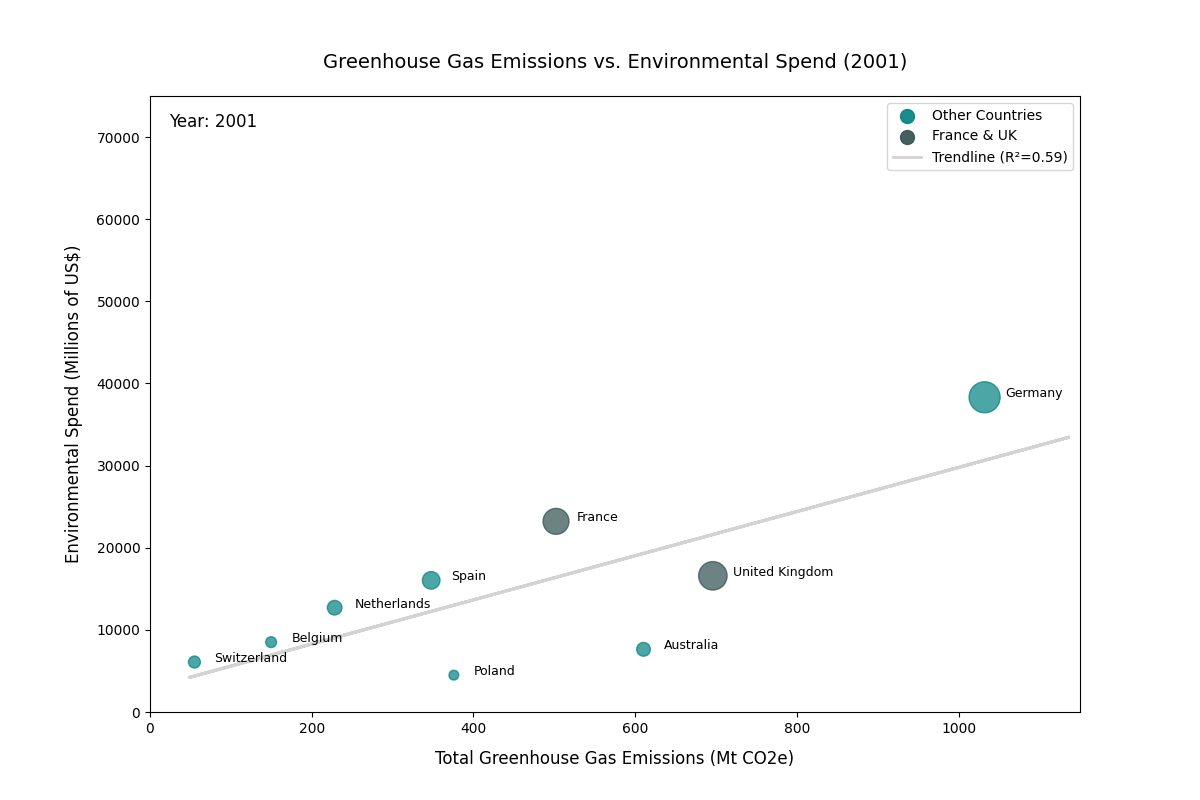

In [86]:
countries = ['Australia', 'Belgium', 'France', 'Germany',
             'Netherlands', 'Poland', 'Spain', 'Switzerland',
             'United Kingdom']


fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Greenhouse Gas Emissions vs. Environmental Spend', pad=20, fontsize=14)
ax.set_xlabel('Total Greenhouse Gas Emissions (Mt CO2e)', labelpad=10, fontsize=12)
ax.set_ylabel('Environmental Spend (Millions of US$)', labelpad=10, fontsize=12)
ax.grid(False)
ax.set_xlim(0, 1150)
ax.set_ylim(0, 75000)

worldb_years = worldb[worldb['Country'].isin(countries)]['Year'].unique()
oecd_years = oecd[oecd['Reference area'].isin(countries)]['TIME_PERIOD'].unique()
available_years = sorted(set(worldb_years) & set(oecd_years))


def animate(year):
    ax.clear()
    ax.set_title(f'Greenhouse Gas Emissions vs. Environmental Spend ({year})', pad=20, fontsize=14)
    ax.set_xlabel('Total Greenhouse Gas Emissions (Mt CO2e)', labelpad=10, fontsize=12)
    ax.set_ylabel('Environmental Spend (Millions of US$)', labelpad=10, fontsize=12)
    ax.grid(False)
    ax.set_xlim(0, 1150)
    ax.set_ylim(0, 75000)

    worldb_year = worldb[(worldb['Year'] == year) &
                         (worldb['Country'].isin(countries))].set_index('Country')
    oecd_year = oecd[(oecd['TIME_PERIOD'] == year) &
                     (oecd['Reference area'].isin(countries))].rename(
                         columns={'Reference area': 'Country', 'OBS_VALUE': 'Environmental_spend'})
    oecd_year_agg = oecd_year.groupby('Country')['Environmental_spend'].sum().reset_index().set_index('Country')

    common_countries = sorted(set(worldb_year.index) & set(oecd_year_agg.index))
    if not common_countries:
        return scatter, trendline, year_text

    x_values = [worldb_year.loc[c, 'Total greenhouse gas emissions including LULUCF (Mt CO2e)'] for c in common_countries]
    y_values = [oecd_year_agg.loc[c, 'Environmental_spend'] for c in common_countries]
    gdp_values = [worldb_year.loc[c, 'GDP (current US$)'] for c in common_countries]

    min_gdp = min(gdp_values) if gdp_values else 1
    max_gdp = max(gdp_values) if gdp_values else 1
    normalized_sizes = [50 + 450 * ((gdp - min_gdp) / (max_gdp - min_gdp)) if max_gdp != min_gdp else 100 for gdp in gdp_values]

    colors = ['darkslategrey' if country in ['France', 'United Kingdom'] else 'teal' for country in common_countries]

    scatter = ax.scatter(x_values, y_values, s=normalized_sizes, c=colors, alpha=0.7)

    for country, x, y in zip(common_countries, x_values, y_values):
        ax.text(x + 25, y + 0, country, fontsize=9, ha='left')

    
        slope, intercept, r_value, _, _ = linregress(x_values, y_values)
        x_trend = np.linspace(min(x_values)*0.9, max(x_values)*1.1, 100)
        y_trend = slope * x_trend + intercept
        trendline, = ax.plot(x_trend, y_trend, color='lightgrey', linestyle='-', linewidth=2)
        ax.legend(handles=[
            plt.scatter([], [], s=100, c='teal', alpha=0.9, label='Other Countries'),
            plt.scatter([], [], s=100, c='darkslategrey', alpha=0.9, label='France & UK'),
            trendline],
            labels=['Other Countries', 'France & UK', f'Trendline (R²={r_value**2:.2f})'],
            fontsize=10, loc='upper right')

    year_text = ax.text(0.02, 0.95, f'Year: {year}', transform=ax.transAxes, fontsize=12)
    return scatter, trendline, year_text

ani = FuncAnimation(
    fig,
    animate,
    frames=available_years,
    interval=4000,
    blit=False,
    repeat_delay=5000
)

ani.save('animationGHG_EnvSpend.gif', writer=PillowWriter(fps=1))
display(Image(filename='animationGHG_EnvSpend.gif'))
plt.close()

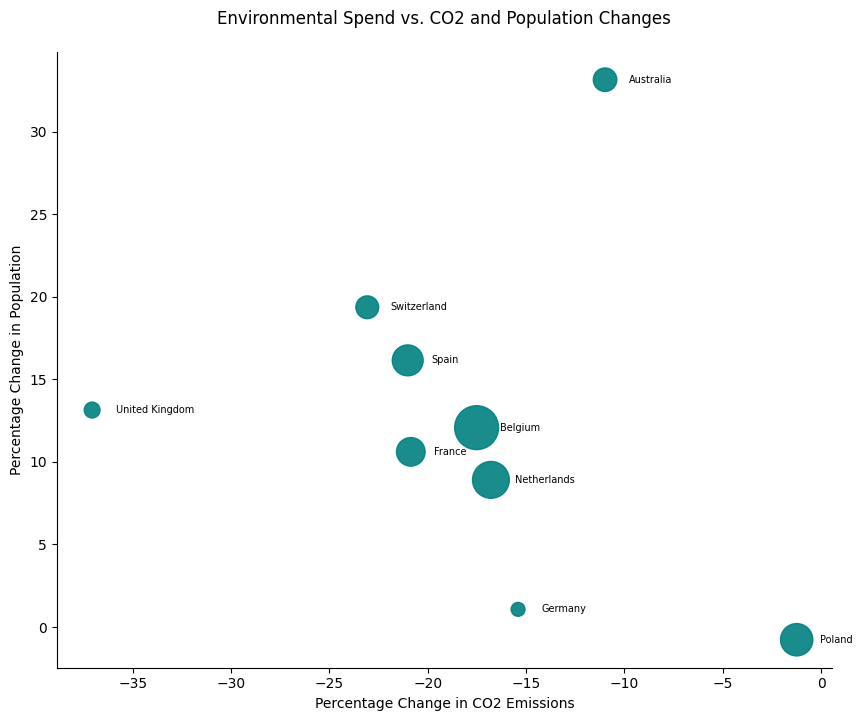

In [82]:
countries = ['Australia', 'Belgium', 'France', 'Germany',
             'Netherlands', 'Poland', 'Spain', 'Switzerland',
             'United Kingdom']
years = sorted(worldb['Year'].unique())

# Create a DataFrame with the required metrics
metrics = []
for country in countries:
    # Get first and last year data
    first_year = years[0]
    last_year = years[-1]

    # Environmental spend as % of GDP (average over period)
    spend_data = oecd[(oecd['Reference area'] == country) &
                     (oecd['TIME_PERIOD'].isin(years))]
    gdp_data = worldb[(worldb['Country'] == country) &
                      (worldb['Year'].isin(years))]

    # Calculate average environmental spend as % of GDP
    total_spend = spend_data['OBS_VALUE'].sum()
    total_gdp = gdp_data['GDP (current US$)'].sum()
    env_spend_pct = (total_spend / total_gdp) * 100 if total_gdp > 0 else 0

    # Calculate CO2 emissions change
    first_co2 = worldb[(worldb['Country'] == country) &
                       (worldb['Year'] == first_year)]['Total greenhouse gas emissions including LULUCF (Mt CO2e)'].values
    last_co2 = worldb[(worldb['Country'] == country) &
                      (worldb['Year'] == last_year)]['Total greenhouse gas emissions including LULUCF (Mt CO2e)'].values

    if len(first_co2) > 0 and len(last_co2) > 0:
        co2_change = ((last_co2[0] - first_co2[0]) / first_co2[0]) * 100
    else:
        co2_change = 0

    # Calculate population change
    first_pop = worldb[(worldb['Country'] == country) &
                       (worldb['Year'] == first_year)]['Population, total'].values
    last_pop = worldb[(worldb['Country'] == country) &
                      (worldb['Year'] == last_year)]['Population, total'].values

    if len(first_pop) > 0 and len(last_pop) > 0:
        pop_change = ((last_pop[0] - first_pop[0]) / first_pop[0]) * 100
    else:
        pop_change = 0

    metrics.append({
        'Country': country,
        'Env_Spend_pct_GDP': env_spend_pct,
        'CO2_Change_pct': co2_change,
        'Pop_Change_pct': pop_change
    })

# Create DataFrame
df = pd.DataFrame(metrics)

#Create the bubble chart
plt.figure(figsize=(10, 8))

# Normalize bubble sizes (environmental spend % of GDP)
min_spend = df['Env_Spend_pct_GDP'].min()
max_spend = df['Env_Spend_pct_GDP'].max()
df['bubble_size'] = 100 + 900 * (df['Env_Spend_pct_GDP'] - min_spend) / (max_spend - min_spend)

# Create scatter plot with bubbles
scatter = plt.scatter(
    df['CO2_Change_pct'],
    df['Pop_Change_pct'],
    s=df['bubble_size'],
    alpha=0.9,
    c='teal',
   
)

# Add labels and title
plt.title('Environmental Spend vs. CO2 and Population Changes', pad=20)
plt.xlabel('Percentage Change in CO2 Emissions')
plt.ylabel('Percentage Change in Population')


# Add country names as annotations
for i, row in df.iterrows():
    plt.text(row['CO2_Change_pct'] + 1.2,
              row['Pop_Change_pct'],
              row['Country'],
              fontsize=7,
              ha='left',
              va='center')

# Add grid
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

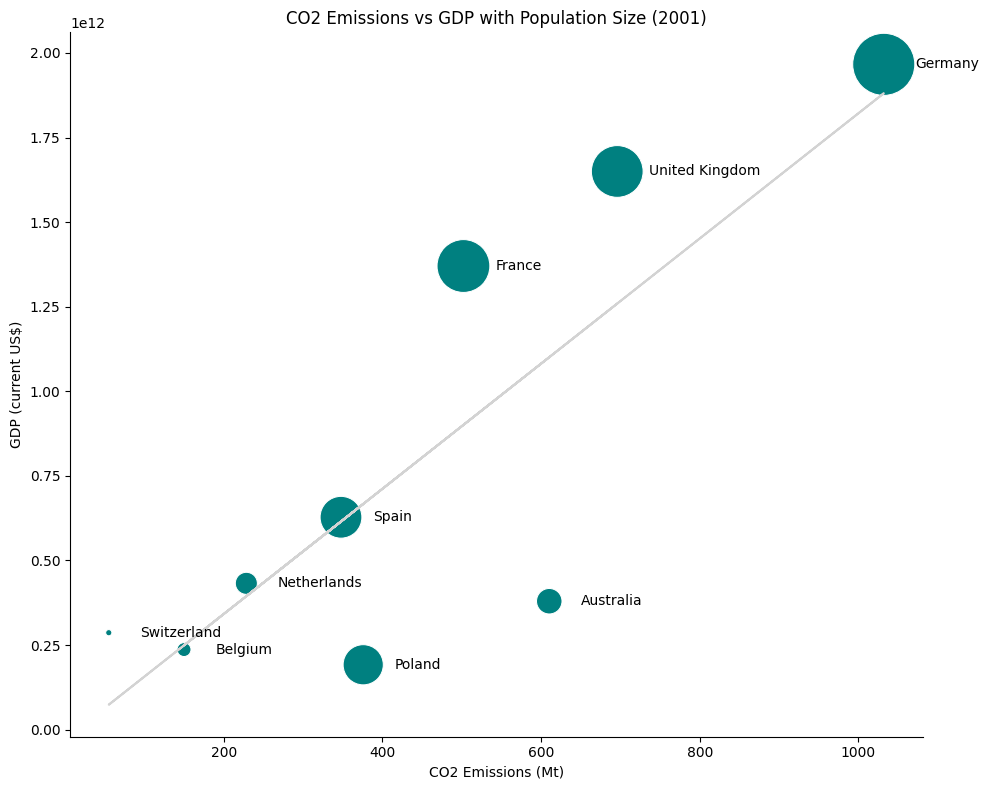

In [73]:
# Filter data for specific countries and year
data = worldb.loc[(worldb["Year"] == 2001) &
                 (worldb["Country"].isin(['Australia', 'Belgium', 'France', 'Germany',
             'Netherlands', 'Poland', 'Spain', 'Switzerland',
             'United Kingdom']))]

# Create bubble chart with beige dots
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    data=data,
    x="Total greenhouse gas emissions including LULUCF (Mt CO2e)",
    y="GDP (current US$)",
    size="Population, total",
    color="teal",
    legend=None,
    sizes=(20, 2000)
)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add country names next to bubbles
for line in range(0, data.shape[0]):
    country = data.iloc[line]['Country']
    x = data.iloc[line]['Total greenhouse gas emissions including LULUCF (Mt CO2e)']
    y = data.iloc[line]['GDP (current US$)']
    plt.text(x+40, y+0, country, fontsize=10, ha='left', va='center' )

# Add labels and title
plt.title('CO2 Emissions vs GDP with Population Size (2001)')
plt.xlabel('CO2 Emissions (Mt)')
plt.ylabel('GDP (current US$)')

x = data['Total greenhouse gas emissions including LULUCF (Mt CO2e)']
y = data['GDP (current US$)']
slope, intercept, _, _, _ = linregress(x, y)
plt.plot(x, slope*x + intercept, color='lightgrey', linestyle='-', linewidth=1.5)


plt.tight_layout()
plt.show()

In [96]:
# Calculate accumulated change for GHG Emissions and the sum of spending and GDP over the timespan
accumulated_change = wb_oecd.groupby('Country').agg(
    GHG_Emissions_Start=('Total greenhouse gas emissions excluding LULUCF (Mt CO2e)', 'first'),
    GHG_Emissions_End=('Total greenhouse gas emissions excluding LULUCF (Mt CO2e)', 'last'),
    Total_Spending_Sum=('Total spending climate protection', 'sum'), # Calculate the sum of spending
    Total_GDP_Sum=('GDP (current US$)', 'sum') # Calculate the sum of GDP
).reset_index()

accumulated_change['GHG Emissions Accumulated Change (%)'] = ((accumulated_change['GHG_Emissions_End'] - accumulated_change['GHG_Emissions_Start']) / accumulated_change['GHG_Emissions_Start']) * 100
# Calculate Total Spending as a percentage of Total GDP
accumulated_change['Total Spending as % of Total GDP'] = (accumulated_change['Total_Spending_Sum'] / accumulated_change['Total_GDP_Sum']) * 100


# Select and display the relevant columns
display(accumulated_change[['Country', 'GHG Emissions Accumulated Change (%)', 'Total Spending as % of Total GDP']])

,Country,GHG Emissions Accumulated Change (%),Total Spending as % of Total GDP
0,Australia,9.519894,1.495909
1,Belgium,-18.273781,2.859582
2,France,-18.879815,1.769514
3,Germany,-22.529062,1.156412
4,Netherlands,-16.352015,2.297780
5,Poland,-3.410687,1.977303
6,Spain,-16.460097,1.896698
7,Switzerland,-13.981977,1.471241
8,United Kingdom,-36.885139,1.217217


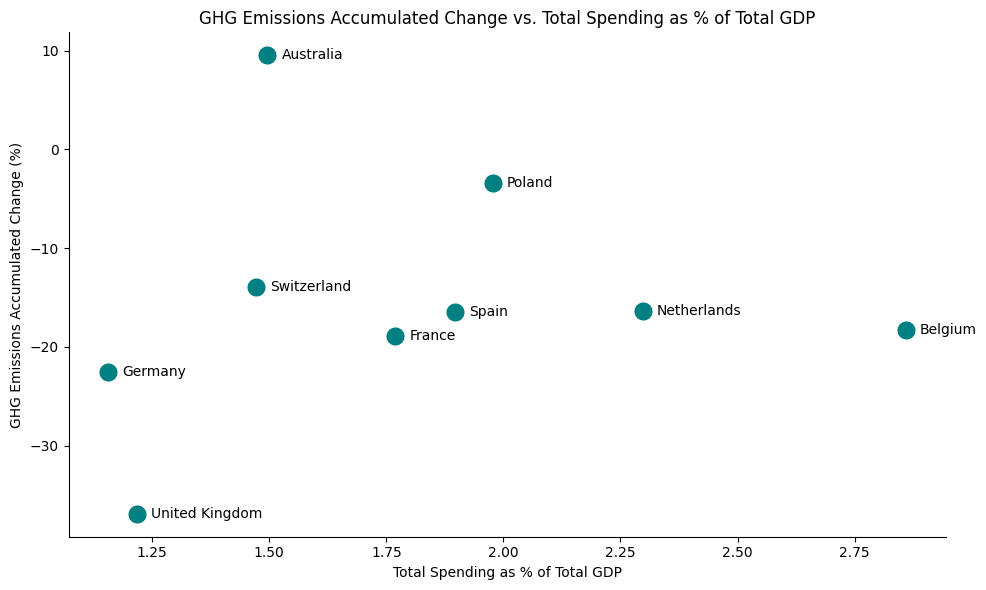

In [97]:
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(
    data=accumulated_change,
    x='Total Spending as % of Total GDP',
    y='GHG Emissions Accumulated Change (%)',
    s=200, 
    color='teal'
)
plt.title('GHG Emissions Accumulated Change vs. Total Spending as % of Total GDP')
plt.xlabel('Total Spending as % of Total GDP')
plt.ylabel('GHG Emissions Accumulated Change (%)')

plt.grid(False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


for i in range(len(accumulated_change)):
    plt.text(
        accumulated_change['Total Spending as % of Total GDP'][i] + 0.03,
        accumulated_change['GHG Emissions Accumulated Change (%)'][i],
        accumulated_change['Country'][i],
        fontsize=10, 
        ha='left', 
        va='center' 
    )

plt.tight_layout()
plt.show()

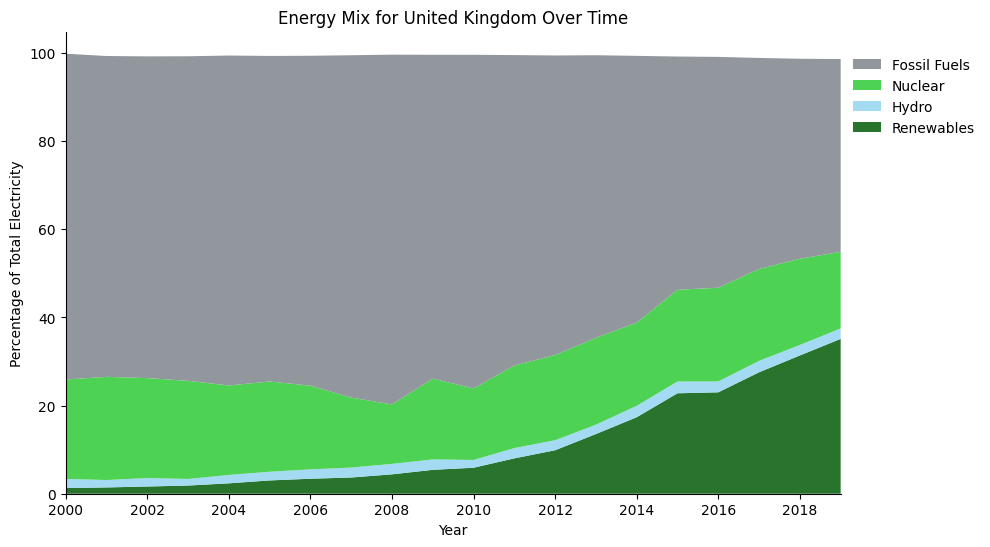

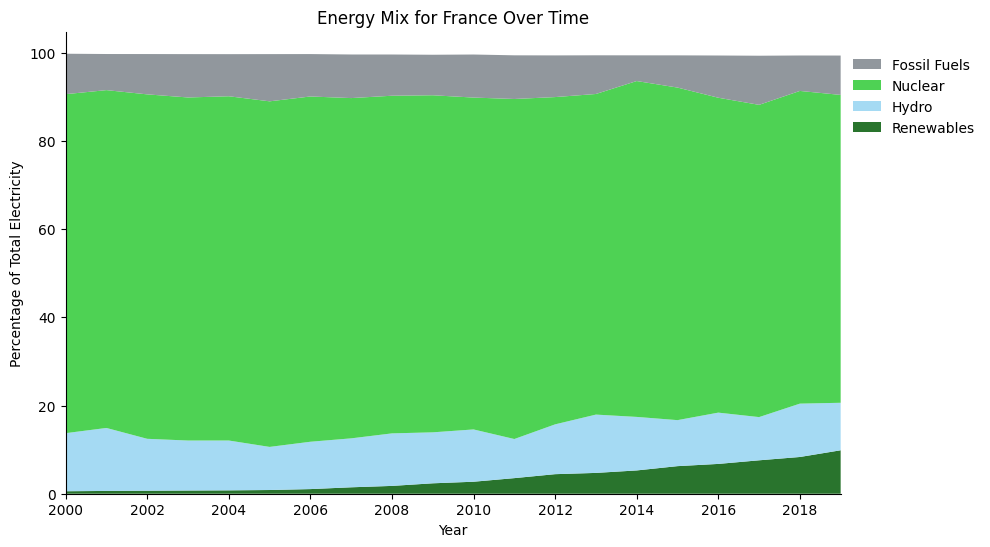

In [70]:
countries = ['United Kingdom', 'France']
columns = [
    'Electricity production from renewable sources, excluding hydroelectric (% of total)',
    'Electricity production from nuclear sources (% of total)',
    'Electricity production from oil, gas and coal sources (% of total)',
    'Electricity production from hydroelectric sources (% of total)'
]

energy_data = worldb[worldb['Country'].isin(countries)][['Country', 'Year'] + columns]
energy_data = energy_data.dropna()
energy_data['Year'] = energy_data['Year'].astype(int)

for country in countries:

    country_data = energy_data[energy_data['Country'] == country]

    plt.figure(figsize=(10, 6))

    colors = ["#1D6D21", "#a0d8f3", "#44d04b", "#8b9298"]
    plt.stackplot(
        country_data['Year'],
        country_data[columns[0]],
        country_data[columns[3]],
        country_data[columns[1]],
        country_data[columns[2]],
        labels=['Renewables', 'Hydro', 'Nuclear', 'Fossil Fuels'],
        colors=colors,
        alpha=0.95,
    )

    plt.title(f'Energy Mix for {country} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Percentage of Total Electricity')

    handles, labels = plt.gca().get_legend_handles_labels()
    handles = handles[::-1]
    labels = labels[::-1]
    plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.0, 0.97), frameon=False)

    ax = plt.gca()
    ax.set_xlim(country_data['Year'].min(), country_data['Year'].max())
    ax.margins(x=0)  

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    plt.show()


## 07 - Presentation

> Make a presentation about your scenario, the data you've collected and the direction you're taking in the next months.


- describe your scenario and plant the context
- specify the location and the timeframe
- describe the APIs and the data collected, why they are relevant
- explain the steps your team took in order to get to a clean and structured dataset
- display the statistics and relevant data visualisations that helped you make informed decisions.
- draw the conclusions based on the data analysis you have performed.
- create a good story!